## Nutrition Recommendation experiment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('D:\\AI---Personalized-Workout-Nutrition-Coach\\data\\raw_data\\nutrition.csv')
df.head()

,id,meal_name,calories,protein_g,carbs_g,fats_g,age,gender,bmi,goal,diet_type
0,1,Grilled Chicken Salad,350,30,20,10,25,Male,24.5,Build Muscle,High Protein
1,2,Oatmeal with Berries,250,8,40,5,30,Female,22.1,Weight Loss,Vegetarian
2,3,Protein Shake,200,25,10,5,28,Male,23.4,Toning,Keto
3,4,Avocado Toast,300,10,35,12,35,Female,27.8,Endurance,Vegan
4,5,Steamed Salmon with Rice,400,35,30,15,22,Male,21.9,Build Muscle,Pescatarian


In [4]:
df=df.drop(columns=['id'], axis=1)
df.head()

,meal_name,calories,protein_g,carbs_g,fats_g,age,gender,bmi,goal,diet_type
0,Grilled Chicken Salad,350,30,20,10,25,Male,24.5,Build Muscle,High Protein
1,Oatmeal with Berries,250,8,40,5,30,Female,22.1,Weight Loss,Vegetarian
2,Protein Shake,200,25,10,5,28,Male,23.4,Toning,Keto
3,Avocado Toast,300,10,35,12,35,Female,27.8,Endurance,Vegan
4,Steamed Salmon with Rice,400,35,30,15,22,Male,21.9,Build Muscle,Pescatarian


## EDA

In [6]:
sns.set(style="whitegrid",palette="muted", font_scale=1.5)

<Figure size 800x600 with 0 Axes>

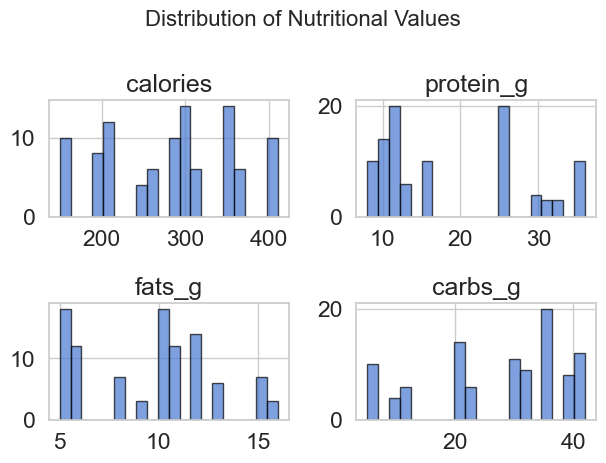

In [9]:
plt.figure(figsize=(8,6))
df[['calories','protein_g','fats_g','carbs_g']].hist(bins=20, edgecolor='black', alpha=0.7)
plt.suptitle('Distribution of Nutritional Values', fontsize=16)
plt.tight_layout()
plt.show()

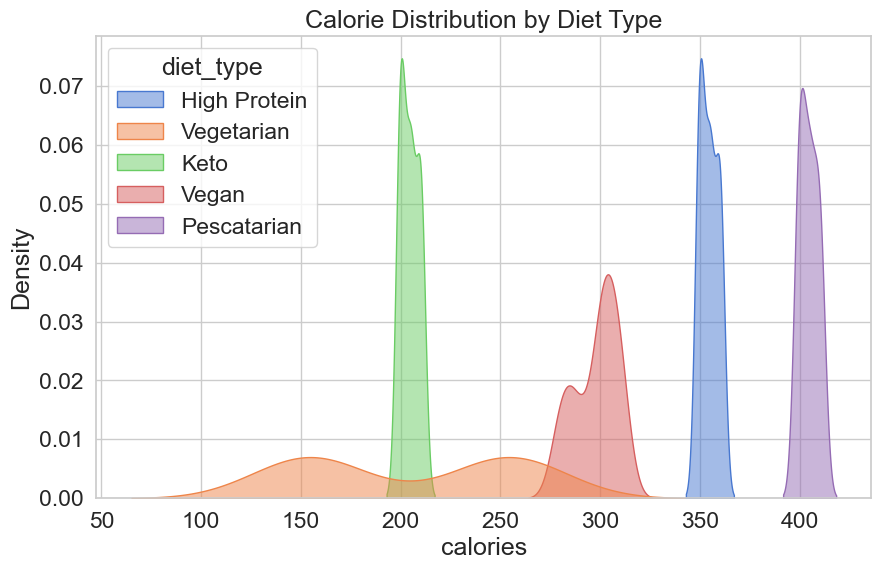

In [10]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='calories', hue='diet_type', fill=True, common_norm=False, alpha=0.5)
plt.title("Calorie Distribution by Diet Type")
plt.show()

C:\Users\samarth\AppData\Local\Temp\ipykernel_20184\141679038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="goal", y="calories", palette="Set3", )


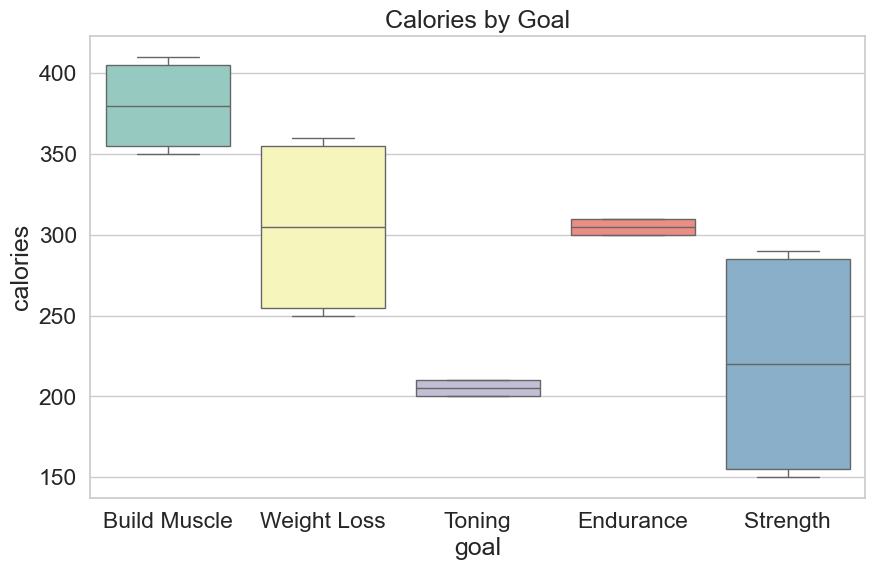

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="goal", y="calories", palette="Set3", )
plt.title("Calories by Goal")
plt.show()

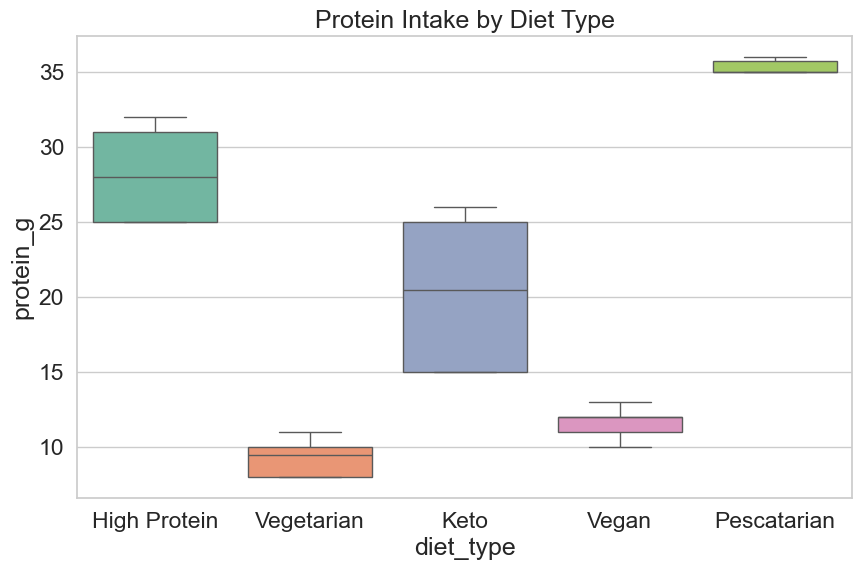

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="diet_type", y="protein_g", palette="Set2", hue='diet_type', legend=False)
plt.title("Protein Intake by Diet Type")
plt.show()

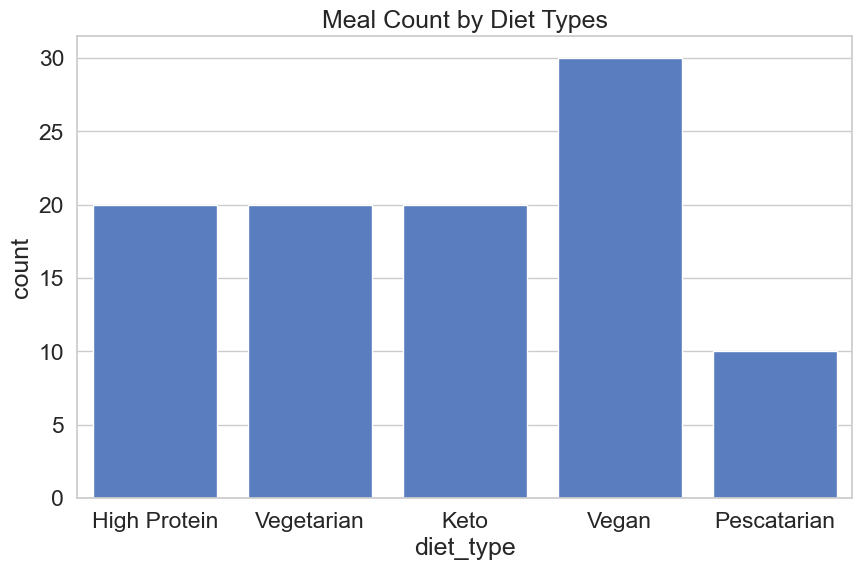

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='diet_type')
plt.title("Meal Count by Diet Types")
plt.show()

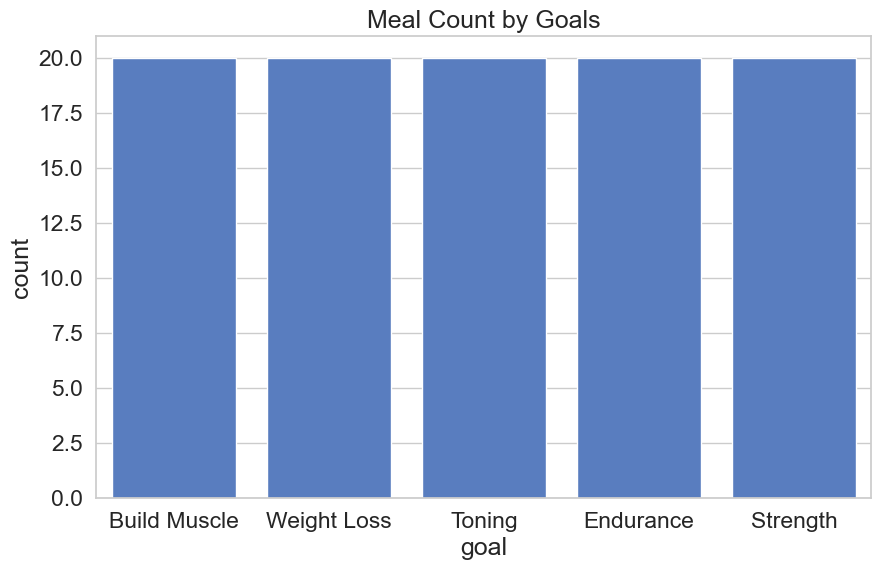

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='goal')
plt.title("Meal Count by Goals")
plt.show()

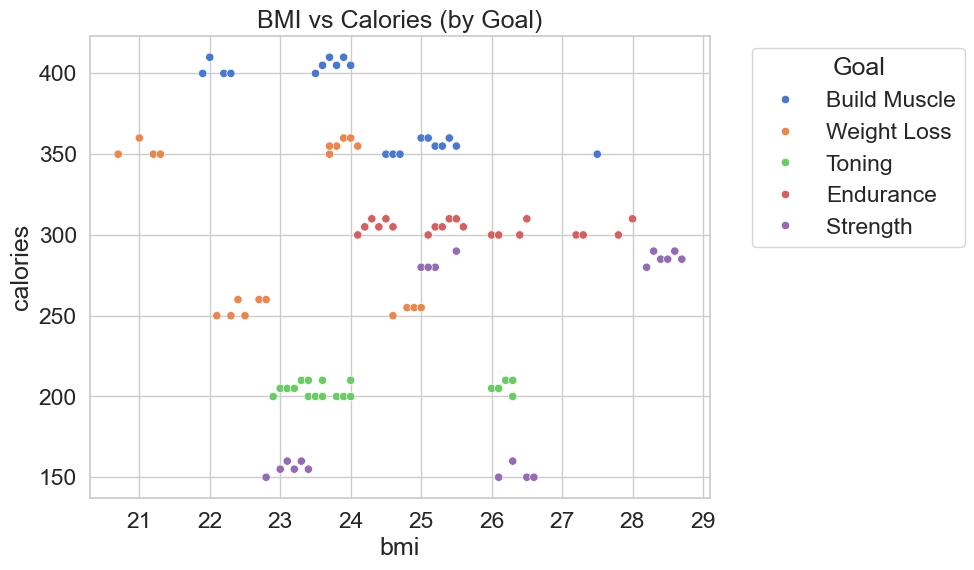

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="bmi", y="calories", hue="goal")
plt.title("BMI vs Calories (by Goal)")
plt.legend(title="Goal", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

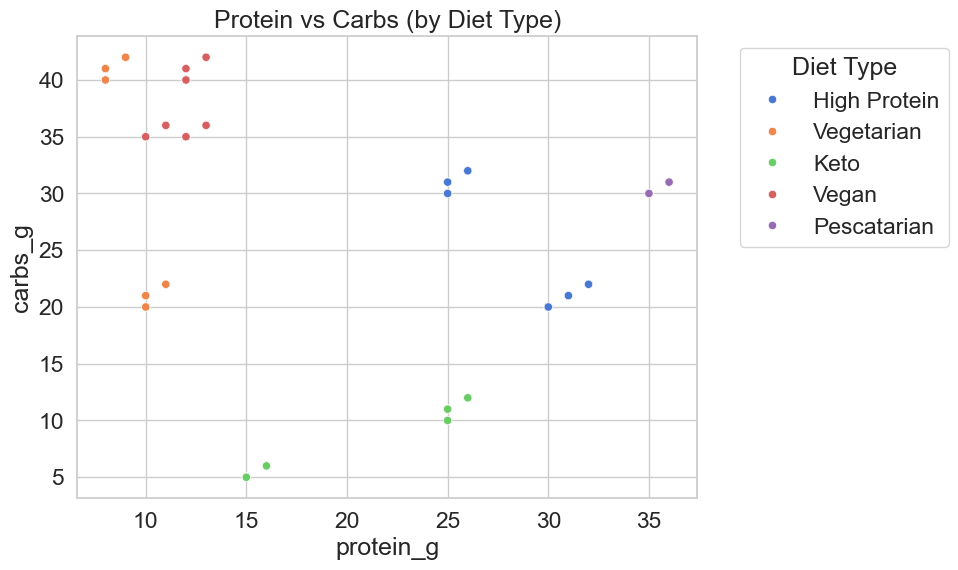

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="protein_g", y="carbs_g", hue="diet_type")
plt.title("Protein vs Carbs (by Diet Type)")
plt.legend(title="Diet Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

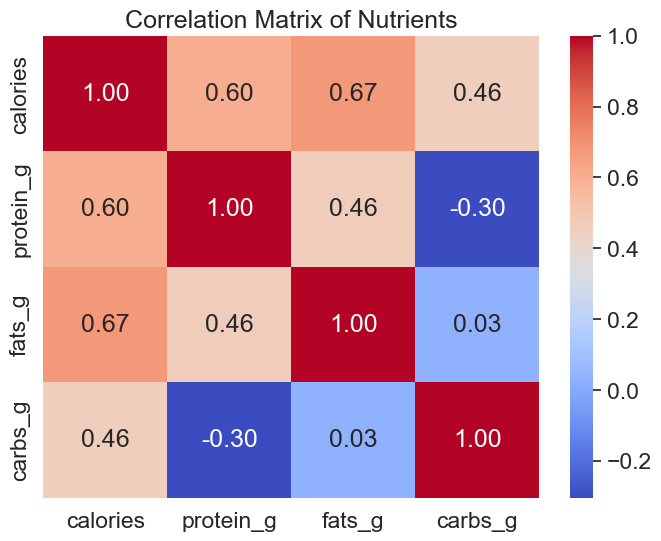

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['calories','protein_g','fats_g','carbs_g']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Nutrients")
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   meal_name  100 non-null    object 
 1   calories   100 non-null    int64  
 2   protein_g  100 non-null    int64  
 3   carbs_g    100 non-null    int64  
 4   fats_g     100 non-null    int64  
 5   age        100 non-null    int64  
 6   gender     100 non-null    object 
 7   bmi        100 non-null    float64
 8   goal       100 non-null    object 
 9   diet_type  100 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 7.9+ KB


## Data Preprocessing and Model Training

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, classification_report

In [25]:
X=df[['age','gender','bmi','goal','diet_type']] # dependent variables
# Targets
y_meal=df['meal_name'] #classification target
y_nutrients=df[['calories','protein_g','fats_g','carbs_g']] # regression targets

In [26]:
categorical_features = ['gender', 'goal', 'diet_type']
numerical_features = ['age', 'bmi']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', Pipeline(steps=[
            ('imputer',KNNImputer(n_neighbors=5)),
            ('scaler', StandardScaler())
        ]),numerical_features)
    ]
)

In [27]:
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['gender', 'goal', 'diet_type']),
                                ('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'bmi'])])

In [28]:
## train-test split
X_train, X_test, y_meal_train, y_meal_test = train_test_split(X, y_meal, test_size=0.2, random_state=42)
_,_, y_nutrients_train, y_nutrients_test = train_test_split(X, y_nutrients, test_size=0.2, random_state=42)

In [29]:
## Pipeline
meal_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

nutrients_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)))
])

In [30]:
meal_pipeline.fit(X_train, y_meal_train)
nutrients_pipeline.fit(X_train, y_nutrients_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'goal',
                                                   'diet_type']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi'])])),
                ('regressor',
                 MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42)))])

In [39]:
df

,meal_name,calories,protein_g,carbs_g,fats_g,age,gender,bmi,goal,diet_type
0,Grilled Chicken Salad,350,30,20,10,25,Male,24.5,Build Muscle,High Protein
1,Oatmeal with Berries,250,8,40,5,30,Female,22.1,Weight Loss,Vegetarian
2,Protein Shake,200,25,10,5,28,Male,23.4,Toning,Keto
3,Avocado Toast,300,10,35,12,35,Female,27.8,Endurance,Vegan
4,Steamed Salmon with Rice,400,35,30,15,22,Male,21.9,Build Muscle,Pescatarian
...,...,...,...,...,...,...,...,...,...,...
95,Vegetable Stir Fry,285,12,41,10,33,Female,28.7,Strength,Vegan
96,Greek Yogurt with Honey,155,10,21,5,25,Male,23.4,Strength,Vegetarian
97,Turkey Sandwich,355,25,31,10,30,Female,24.1,Weight Loss,High Protein
98,Boiled Eggs,205,15,5,12,32,Male,26.1,Toning,Keto


In [35]:
y_meal_pred = meal_pipeline.predict(X_test)
print("Meal Classification report\n",classification_report(y_meal_test, y_meal_pred))

Meal Classification report
                           precision    recall  f1-score   support

           Avocado Toast       1.00      1.00      1.00         4
             Boiled Eggs       1.00      1.00      1.00         1
 Greek Yogurt with Honey       1.00      1.00      1.00         1
   Grilled Chicken Salad       1.00      1.00      1.00         6
    Oatmeal with Berries       1.00      1.00      1.00         1
           Protein Shake       1.00      1.00      1.00         2
            Quinoa Salad       1.00      1.00      1.00         1
Steamed Salmon with Rice       1.00      1.00      1.00         2
         Turkey Sandwich       1.00      1.00      1.00         1
      Vegetable Stir Fry       1.00      1.00      1.00         1

                accuracy                           1.00        20
               macro avg       1.00      1.00      1.00        20
            weighted avg       1.00      1.00      1.00        20



In [36]:
y_nutrient_pred = nutrients_pipeline.predict(X_test)
print("Calorie MAE:", mean_absolute_error(y_nutrients_test["calories"], y_nutrient_pred[:, 0]))
print("Protein MAE:", mean_absolute_error(y_nutrients_test["protein_g"], y_nutrient_pred[:, 1]))
print("Fats MAE:", mean_absolute_error(y_nutrients_test["fats_g"], y_nutrient_pred[:, 2]))
print("Carbs MAE:", mean_absolute_error(y_nutrients_test["carbs_g"], y_nutrient_pred[:, 3]))

Calorie MAE: 3.5694999999999992
Protein MAE: 0.5933333333333332
Fats MAE: 0.4686166666666665
Carbs MAE: 0.7054999999999993


In [42]:
# inference example
sample_user = pd.DataFrame([{
    "age": 25, "gender": "Male", "bmi": 23, "goal": "Build Muscle", "diet_type": "High Protein"
}])


predicted_meal = meal_pipeline.predict(sample_user)[0]
predicted_nutrients = nutrients_pipeline.predict(sample_user)[0]


print("\n--- Recommended Meal Plan ---")
print(f"Meal: {predicted_meal}")
print(f"Calories: {predicted_nutrients[0]:.1f}, Protein: {predicted_nutrients[1]:.1f}g, "
      f"Fats: {predicted_nutrients[2]:.1f}g, Carbs: {predicted_nutrients[3]:.1f}g")


--- Recommended Meal Plan ---
Meal: Grilled Chicken Salad
Calories: 360.6, Protein: 32.1g, Fats: 8.4g, Carbs: 21.2g


In [43]:
import joblib
class NutritionModel:
    def __init__(self, meal_model, nutrients_model):
        self.meal_model = meal_model
        self.nutrients_model = nutrients_model

    def predict(self, user_data):
        meal = self.meal_model.predict(user_data)
        nutrients = self.nutrients_model.predict(user_data)
        results = []
        for i in range(len(user_data)):
            results.append({
                "meal": meal[i],
                "calories": nutrients[i][0],
                "protein_g": nutrients[i][1],
                "fats_g": nutrients[i][2],
                "carbs_g": nutrients[i][3]
            })
        return results
    
    def save(self, filepath):
        joblib.dump(self, filepath)
        
    @classmethod
    def load(cls, filepath):
        return joblib.load(filepath)

In [44]:
combined_model = NutritionModel(meal_pipeline, nutrients_pipeline)
combined_model.save('nutrient_model.pkl')
print("Model saved as 'nutrient_model.pkl'")

Model saved as 'nutrient_model.pkl'


In [46]:
sample_user = pd.DataFrame([{
    "age": 25, "gender": "Male", "bmi": 23, "goal": "Build Muscle", "diet_type": "High Protein"
}])

prediction = combined_model.predict(sample_user)
print(prediction)
# print("\n--- Recommended Meal Plan ---")
# print(f"Meal: {prediction['meal_name']}")
# print(f"Calories: {prediction['calories']:.1f}, Protein: {prediction['protein']:.1f}g, "
#       f"Fats: {prediction['fats']:.1f}g, Carbs: {prediction['carbs']:.1f}g")

[{'meal': 'Grilled Chicken Salad', 'calories': 360.65, 'protein_g': 32.1, 'fats_g': 8.45, 'carbs_g': 21.18}]


In [49]:
prediction[0]

{'meal': 'Grilled Chicken Salad',
 'calories': 360.65,
 'protein_g': 32.1,
 'fats_g': 8.45,
 'carbs_g': 21.18}